<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Parciales_SyS/Parcial%201_SyS/Punto_1_y_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Conceptos Basicos y Serie de Fourier
* Señales y Sistemas 2025-I
* Profesor: Andres Marino Alvarez Meza, Ph.D.
* Departamento de Ingenierıa Electrica, Electronica, y Computacion
* Universidad Nacional de Colombia - sede Manizales

---
# 1. Simulación del Proceso de Digitalización de una Señal
Simulacion del proceso de digitalización para la señal:

$$
x(t) = 20 \sin(7t - \frac{\pi}{2}) - 3 \cos(5t) + 2 \cos(10t)
$$

Se incluyen los pasos de acondicionamiento, muestreo y cuantización usando un convertidor analógico-digital (ADC) de 5 bits con un rango de entrada de -3.3 V a 5 V.







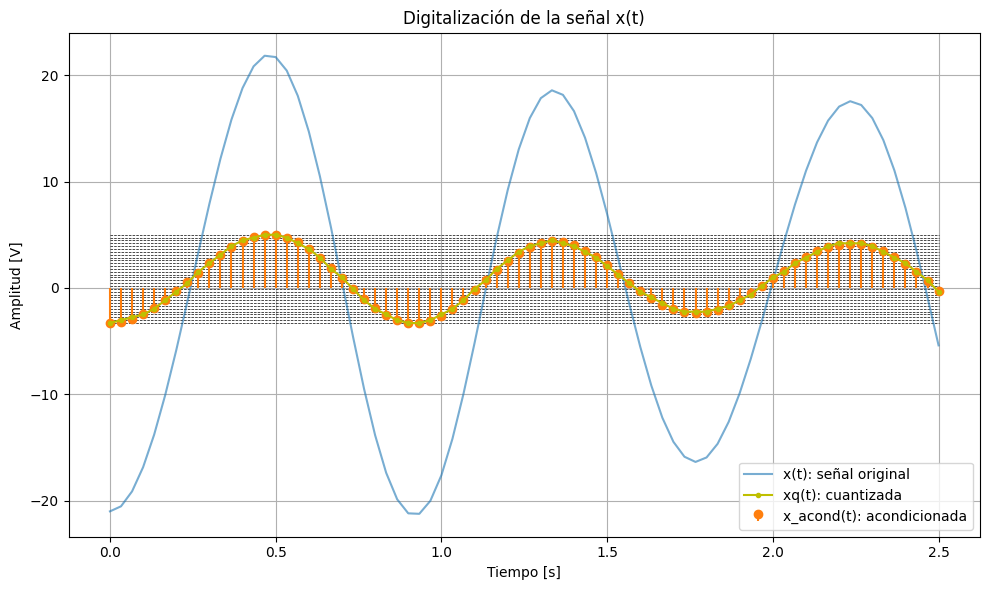

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Señal original: x(t) = -20cos(7t) - 3cos(5t) + 2cos(10t)
# 1. Definimos parámetros de tiempo
T = 2 * np.pi / 5  # periodo de la componente más lenta
ti = 0
tf = 2 * T  # al menos dos periodos de la señal más lenta
Fs = 30  # Frecuencia de muestreo arbitraria alta para simulación (sin aliasing)
Ts = 1 / Fs
tv = np.arange(ti, tf, Ts)

# 2. Construcción de la señal continua
x = -20 * np.cos(7 * tv) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

# 3. Parámetros del ADC
nbits = 5
vmin = -3.3
vmax = 5.0
niveles = np.linspace(vmin, vmax, 2**nbits)

# 4. Función de acondicionamiento (cero y pendiente)
def ceropen(y, ymin, ymax):
    x_min = np.min(y)
    x_max = np.max(y)
    a = (ymax - ymin) / (x_max - x_min)
    b = ymin - a * x_min
    return a * y + b

# 5. Función de cuantización
def cuantizador(valor, niveles):
    diferencias = np.abs(niveles - valor)
    indice_min = np.argmin(diferencias)
    return niveles[indice_min]

# 6. Acondicionamiento
x_acond = ceropen(x, vmin, vmax)

# 7. Cuantización
xq = np.array([cuantizador(val, niveles) for val in x_acond])

# 8. Gráficas
plt.figure(figsize=(10, 6))
for v in niveles:
    plt.plot(tv, v * np.ones(len(tv)), 'k--', linewidth=0.5)

plt.plot(tv, x, label='x(t): señal original', alpha=0.6)
plt.stem(tv, x_acond, linefmt='C1-', markerfmt='C1o', basefmt=" ", label='x_acond(t): acondicionada')
plt.plot(tv, xq, 'y.-', label='xq(t): cuantizada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.title('Digitalización de la señal x(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 2. Evaluación del Muestreo y Diseño de Conversor A/D para una Señal
Diseñar un conversor adecuado para:

$$
x(t) = 3 \cos(1000{\pi}t) + 5 \sin(2000{\pi}t) + 10 \cos(11000{\pi}t)
$$

* La señal original se define para tiempo continuo.

* Se muestrea con dos frecuencias: 5 kHz (inadecuada) y 12 kHz (adecuada).

* Se grafican las señales para comparar.

* Se puede observar aliasing en el muestreo a 5 kHz, porque la frecuencia de muestreo es menor que el doble de la frecuencia máxima presente.

* El muestreo a 12 kHz es adecuado y no presenta aliasing(cumple Nyquist, pero si la aumentamos puede ser mejor, esto solo es un ejemplo).

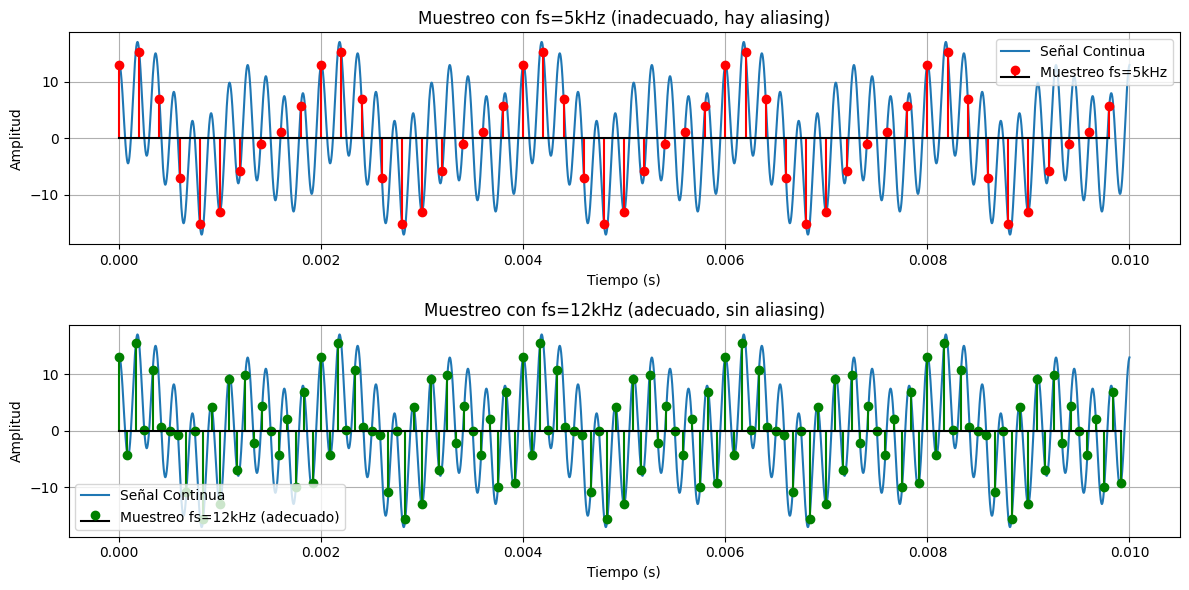

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs_inadecuado = 5000          # Frecuencia de muestreo inadecuada (Hz)
fs_adecuado = 12000           # Frecuencia de muestreo adecuada (Hz)
t_final = 0.01                # Tiempo suficientemente corto para visualizar
                              #varias oscilaciones de las componentes de
                              # frecuencia más bajas de la señal y poder #apreciar el muestreo

t_continuo = np.linspace(0, t_final, 10000)  # Tiempo continuo para señal original

# Definición de la señal continua x(t)
def x_t(t):
    return 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# Señal continua
x_cont = x_t(t_continuo)

# Función para muestrear la señal
def muestrear(fs):
    T = 1/fs
    n = np.arange(0, t_final, T)
    x_muestreada = x_t(n)
    return n, x_muestreada

# Muestreo con fs inadecuado
t_m_inadecuado, x_m_inadecuado = muestrear(fs_inadecuado)

# Muestreo con fs adecuado
t_m_adecuado, x_m_adecuado = muestrear(fs_adecuado)

# Graficar resultados
plt.figure(figsize=(12,6))

# Señal continua y muestreada fs=5kHz
plt.subplot(2,1,1)
plt.plot(t_continuo, x_cont, label='Señal Continua')
plt.stem(t_m_inadecuado, x_m_inadecuado, linefmt='r-', markerfmt='ro', basefmt='k-', label='Muestreo fs=5kHz')
plt.title('Muestreo con fs=5kHz (inadecuado, hay aliasing)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Señal continua y muestreada fs=12kHz
plt.subplot(2,1,2)
plt.plot(t_continuo, x_cont, label='Señal Continua')
plt.stem(t_m_adecuado, x_m_adecuado, linefmt='g-', markerfmt='go', basefmt='k-', label='Muestreo fs=12kHz (adecuado)')
plt.title('Muestreo con fs=12kHz (adecuado, sin aliasing)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

